In [1]:
import pandas as pd
import geopandas as gpd
import os

In [2]:
# .shp => shapefile (very common geo format)
path = gpd.datasets.get_path("naturalearth_lowres")
path

'/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [3]:
# dir that contains the shapefile
# "shapefile" is actually a collection of files
os.listdir("/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres")

['naturalearth_lowres.shx',
 'naturalearth_lowres.shp',
 'naturalearth_lowres.dbf',
 'naturalearth_lowres.cpg',
 'naturalearth_lowres.prj']

In [4]:
os.listdir("/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/")

['naturalearth_cities',
 'nybb_16a.zip',
 'naturalearth_lowres',
 '__pycache__',
 'naturalearth_creation.py',
 '__init__.py']

In [5]:
df = gpd.read_file(path).set_index("name")
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [7]:
type(df).__mro__ # method resolution order

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [8]:
df["geometry"]

name
Fiji                        MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
Tanzania                    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
W. Sahara                   POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
Canada                      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
United States of America    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                                                  ...                        
Serbia                      POLYGON ((18.82982 45.90887, 18.82984 45.90888...
Montenegro                  POLYGON ((20.07070 42.58863, 19.80161 42.50009...
Kosovo                      POLYGON ((20.59025 41.85541, 20.52295 42.21787...
Trinidad and Tobago         POLYGON ((-61.68000 10.76000, -61.10500 10.890...
S. Sudan                    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

<class 'shapely.geometry.polygon.Polygon'>


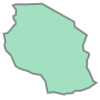

In [9]:
print(type(df["geometry"].iat[1]))
df["geometry"].iat[1]

<class 'shapely.geometry.multipolygon.MultiPolygon'>


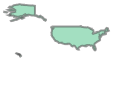

In [10]:
print(type(df["geometry"].at["United States of America"]))
df["geometry"].at["United States of America"]

In [11]:
type(df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

In [12]:
df["colorname"] = "lightgray"
df.loc[df["pop_est"] > 1e8, "colorname"] = "red" # >100 mil
df.head(3)

,pop_est,continent,iso_a3,gdp_md_est,geometry,colorname
name,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",lightgray
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",lightgray
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",lightgray


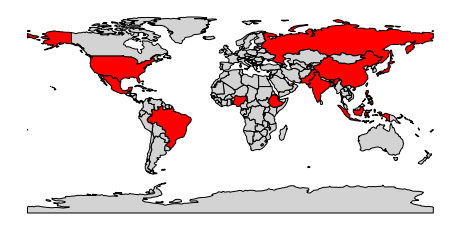

In [13]:
ax = df.plot(figsize=(8,8), color=df["colorname"], edgecolor="black")
ax.set_axis_off()

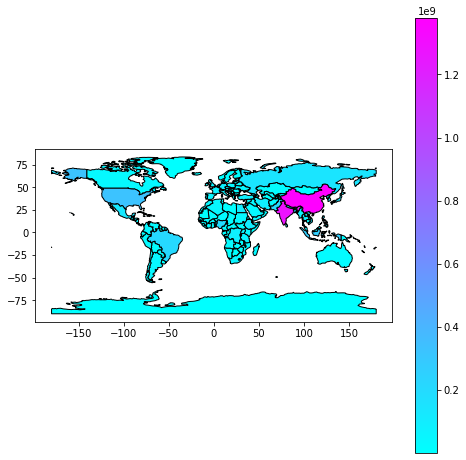

In [14]:
ax = df.plot(figsize=(8,8), column="pop_est",
             edgecolor="black", cmap="cool", legend=True)

# Shapes from Scratch

In [15]:
from shapely.geometry import Polygon, box, Point

<class 'shapely.geometry.polygon.Polygon'>


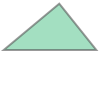

In [16]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])
print(type(p1))
p1

<class 'shapely.geometry.polygon.Polygon'>


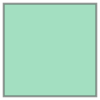

In [17]:
p2 = box(0,0,1,1)
print(type(p2))
p2

<class 'shapely.geometry.point.Point'>


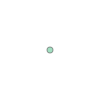

In [18]:
p3 = Point(5,5)
print(type(p3))
p3

<class 'shapely.geometry.polygon.Polygon'>


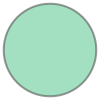

In [19]:
p4 = p3.buffer(1)
print(type(p4))
p4

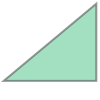

In [20]:
p1.intersection(p2) # AND

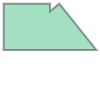

In [21]:
p1.union(p2) # OR

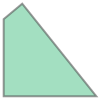

In [22]:
p1.difference(p2) # subtraction

In [23]:
p1.intersects(p2)

True

In [24]:
p1.intersects(p3)

False

False


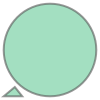

In [25]:
nearby_p3 = p3.buffer(5)
print(p1.intersects(nearby_p3))
p1.union(nearby_p3)

<AxesSubplot:>

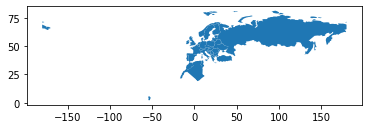

In [26]:
eur_window = box(-10.67, 34.5, 31.55, 71.06)
df[df.intersects(eur_window)].plot()

<AxesSubplot:>

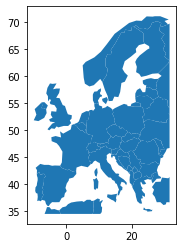

In [27]:
europe1 = df.intersection(eur_window)
europe1 = europe1[~europe1.is_empty]
europe1.plot()

/tmp/ipykernel_12541/550175523.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe1.centroid.plot(ax=area, color="red")


<AxesSubplot:>

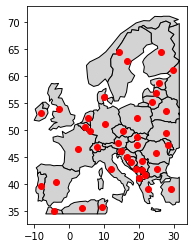

In [28]:
area = europe1.plot(color="lightgray", edgecolor="black")
europe1.centroid.plot(ax=area, color="red")

In [29]:
europe1.crs # coordinate reference system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

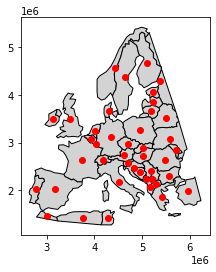

In [30]:
europe2 = europe1.to_crs("EPSG:3035")
area = europe2.plot(color="lightgray", edgecolor="black")
europe2.centroid.plot(ax=area, color="red")
#europe1.centroid.to_crs("EPSG:3035").plot(ax=area, color="blue")

In [32]:
europe2.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

In [36]:
europe1.area.head()

/tmp/ipykernel_12541/608133378.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe1.area.head()


name
Russia     35.748174
Norway     61.472611
France     65.673811
Tunisia     6.540885
Algeria    21.165124
dtype: float64

<AxesSubplot:>

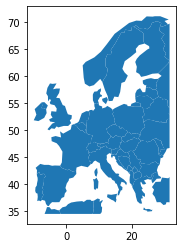

In [35]:
europe1.plot()

In [42]:
(europe2.area / 1e6 / 2.59).sort_values(ascending=False) # sq miles

name
France              216045.735320
Spain               193941.416516
Sweden              173962.955903
Germany             138002.030052
Finland             131750.182704
Norway              126913.320831
Italy               121659.867544
Poland              119844.344075
Ukraine             110345.741832
United Kingdom       96519.589998
Romania              92025.972522
Turkey               85632.236650
Algeria              78882.882393
Belarus              78739.245551
Russia               78170.023756
Greece               50946.870966
Bulgaria             42554.046136
Portugal             36065.021674
Hungary              35704.295877
Austria              32842.862855
Czechia              31354.126319
Serbia               29493.813018
Tunisia              25280.702563
Latvia               24680.969176
Lithuania            24644.688797
Ireland              22568.405096
Croatia              22212.141886
Bosnia and Herz.     19538.365073
Slovakia             18172.796262
Switzerla

<AxesSubplot:>

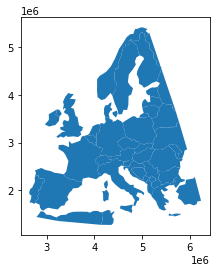

In [39]:
europe2.plot()

# Example: Map of Madison

In [62]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

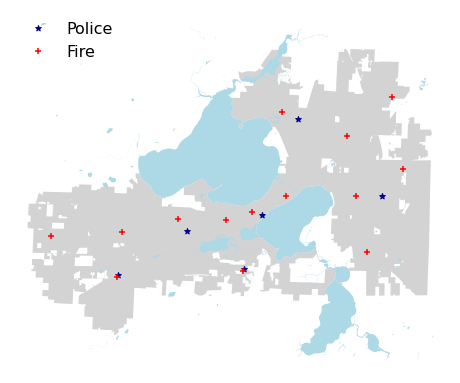

In [70]:
crs = "epsg:32616"
city = gpd.read_file("City_Limit.zip").to_crs(crs)
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(crs)
police = gpd.read_file("Police_Stations.zip").to_crs(crs)

area = city.plot(color="lightgray", figsize=(8,8))
water.plot(color="lightblue", ax=area)
police.plot(color="darkblue", marker="*", ax=area, label="Police")
fire.plot(color="red", marker="+", ax=area, label="Fire")

area.set_axis_off()
plt.legend(loc="upper left", frameon=False)

area.get_figure().savefig("high.png", dpi=300)
area.get_figure().savefig("low.png", dpi=20)

In [71]:
from IPython.core.display import Image

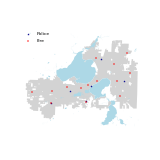

In [72]:
Image("low.png", width=600)

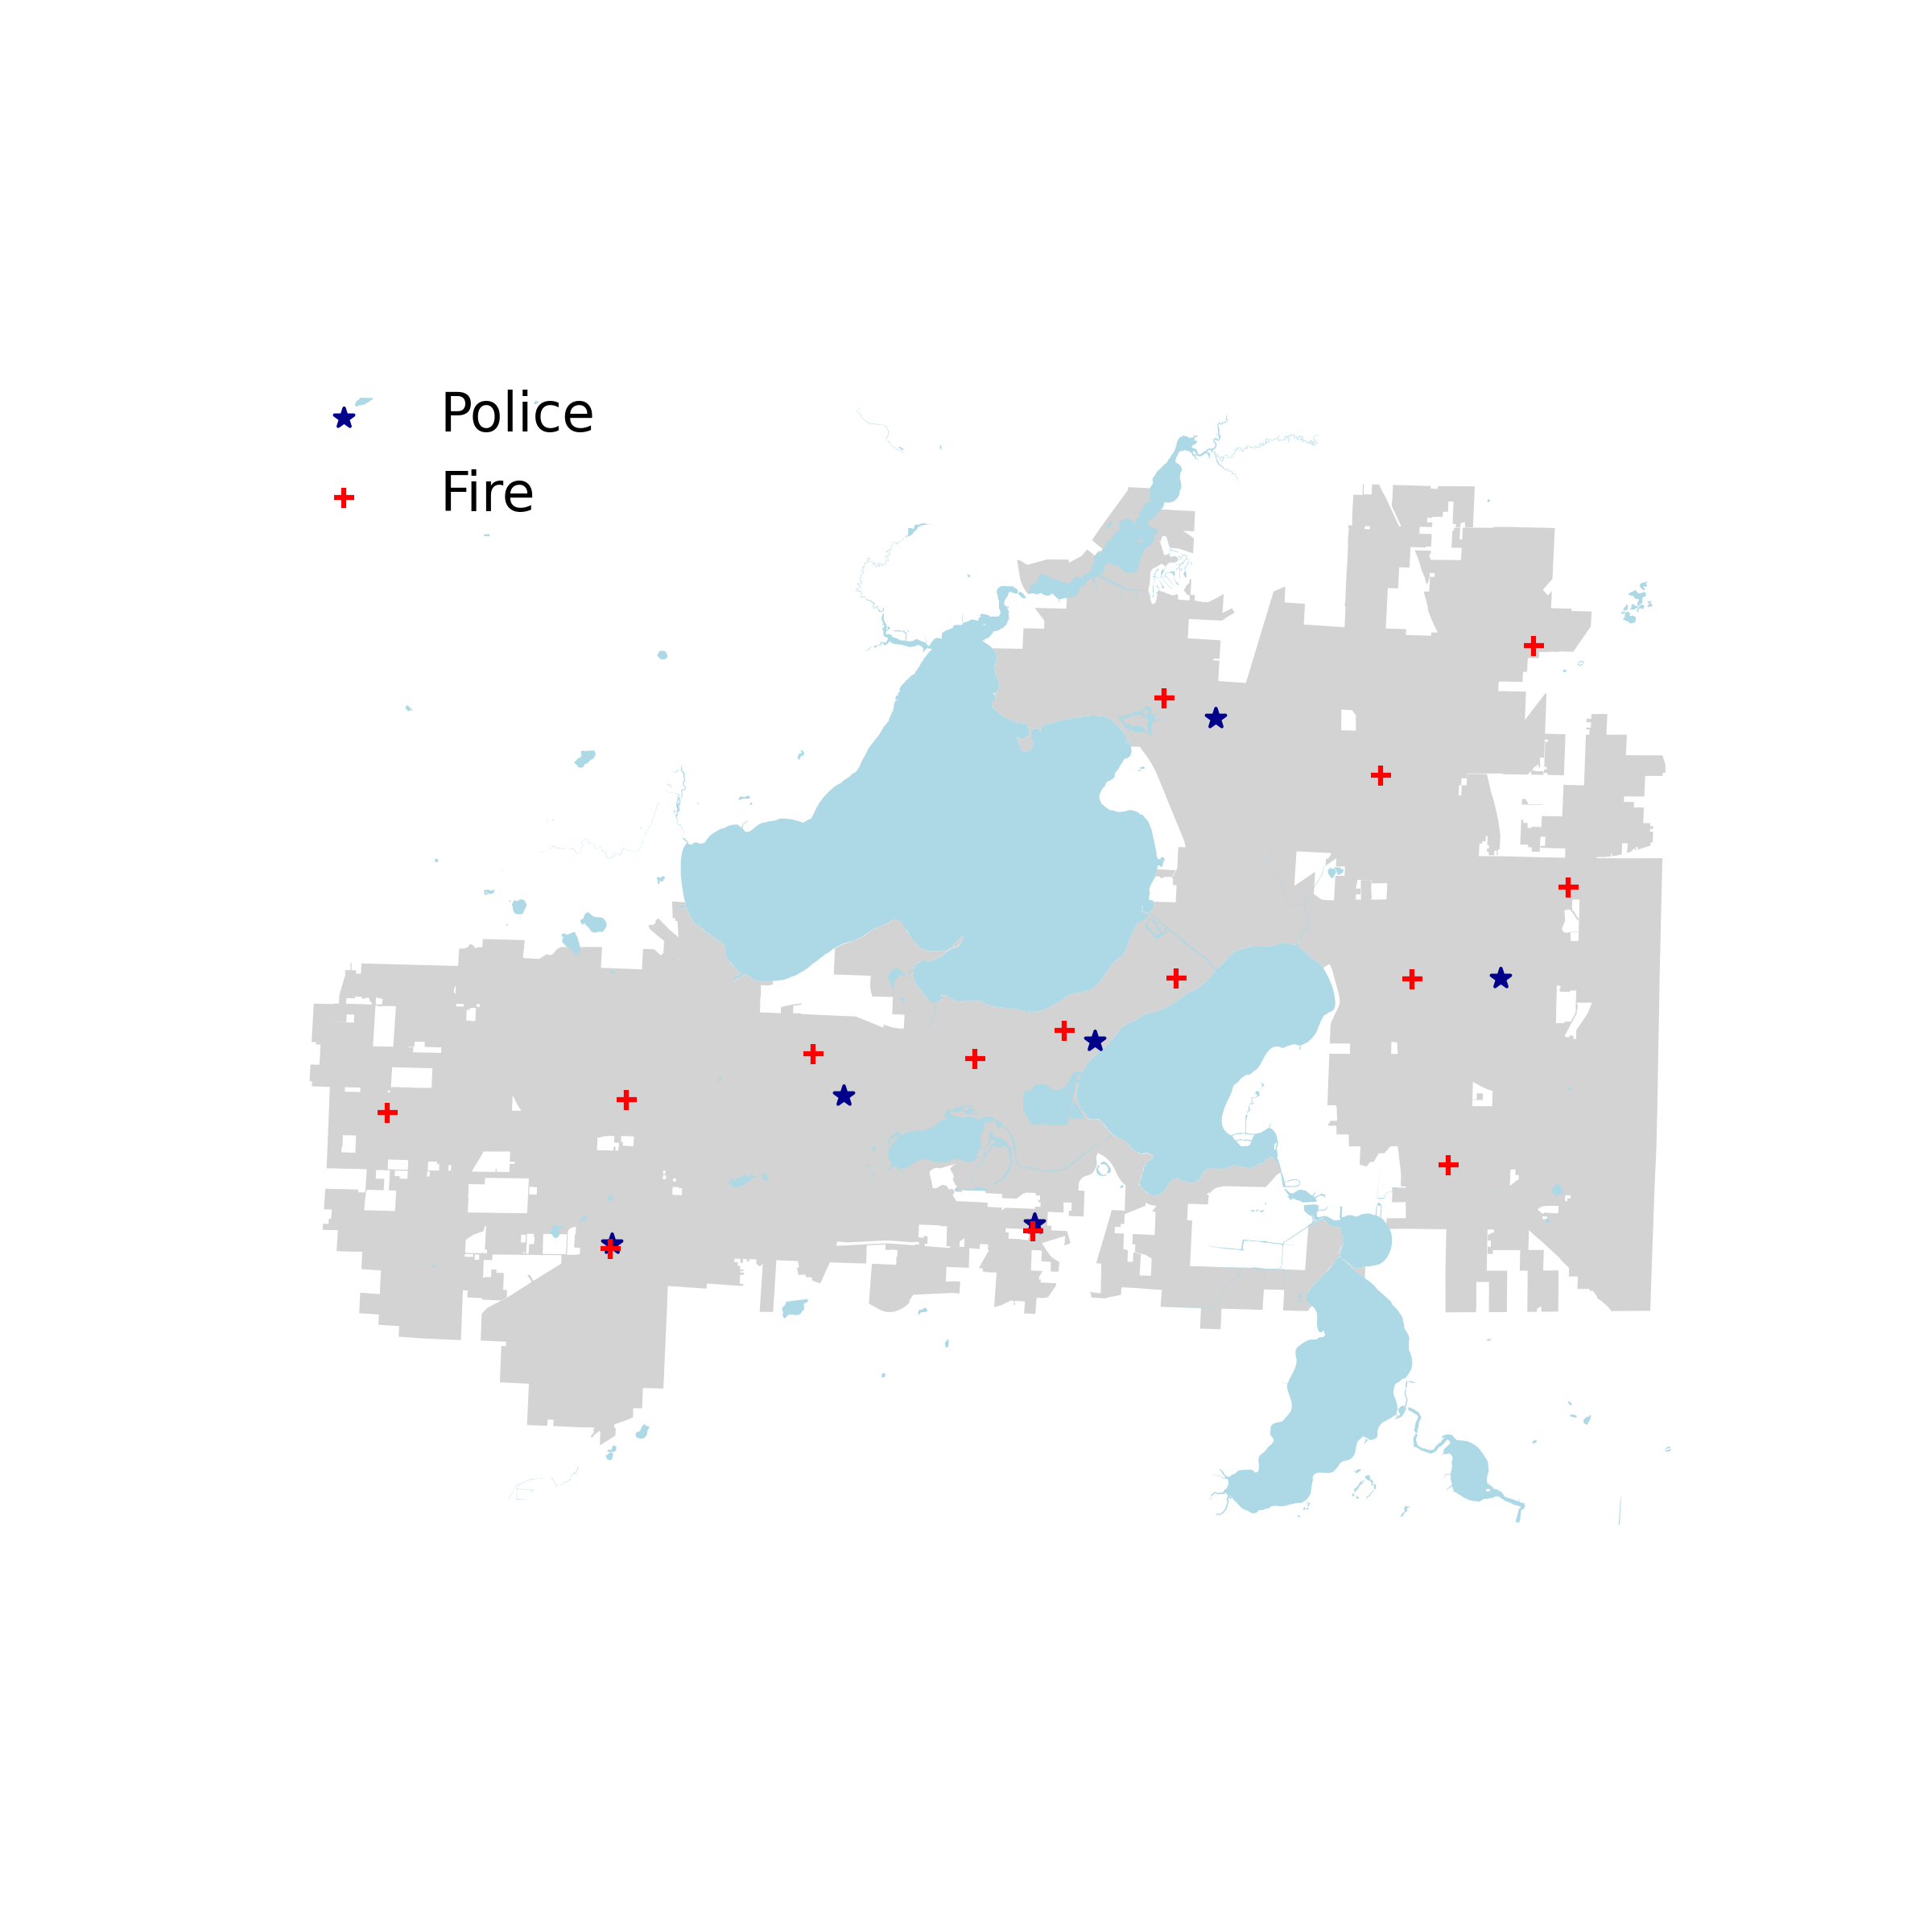

In [74]:
Image("high.png", width=600)